In [1]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics.pairwise import polynomial_kernel

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
print(digits.target.shape)

(1797,)


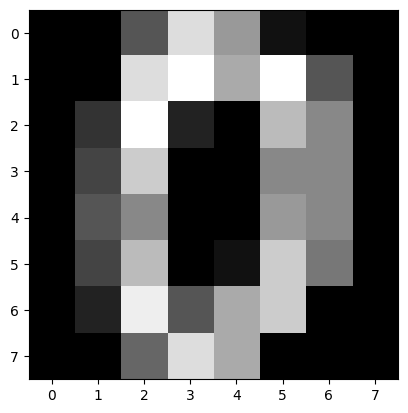

In [4]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

In [5]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=64, random_state=42, stratify=y)

In [7]:
X_train.shape

(1733, 64)

In [8]:
(X_train.T@X_train).shape

(64, 64)

In [9]:

degree = 3
lamb=1e4
kernel = np.linalg.inv(polynomial_kernel(X_train, X_train, degree=degree)+lamb*np.diag(np.ones(X_train.shape[0])))
kernel.shape

(1733, 1733)

In [10]:
pred = y_train@kernel@polynomial_kernel(X_train, X_val, degree=degree)
pred.shape

(64,)

In [11]:
from sklearn.metrics import classification_report, mean_squared_error
print(classification_report(pred.astype(int), y_val))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.57      0.57      0.57         7
           2       0.67      0.44      0.53         9
           3       0.29      0.50      0.36         4
           4       0.57      0.40      0.47        10
           5       0.29      0.29      0.29         7
           6       0.50      0.50      0.50         6
           7       0.33      0.29      0.31         7
           8       0.00      0.00      0.00         6
           9       0.17      1.00      0.29         1

    accuracy                           0.42        64
   macro avg       0.42      0.47      0.41        64
weighted avg       0.47      0.42      0.43        64



In [12]:
mean_squared_error(pred, y_val)

0.5860001406089674

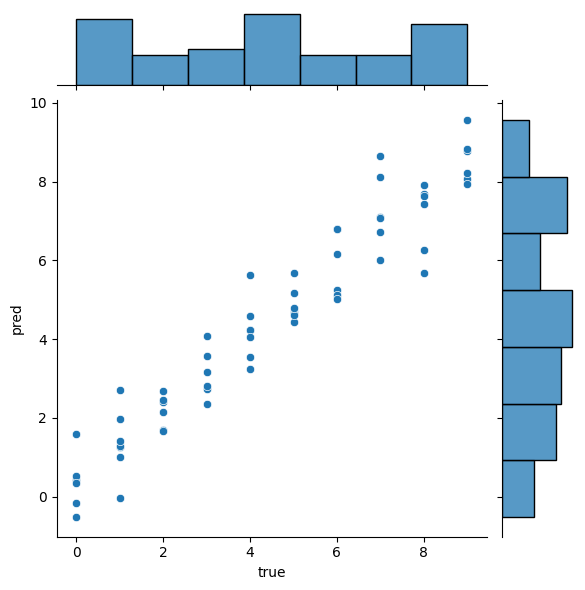

In [13]:

data={
    'true': y_val,
    'pred': pred
}

sns.jointplot(data=data, x='true', y='pred')

In [14]:
i = 0
X_train_ = np.concatenate([X_train[:i], X_train[i+1:]], axis=0)
y_train_ = np.concatenate([y_train[:i], y_train[i+1:]], axis=0)

print(X_train_.shape)
kernel_ = np.linalg.inv(polynomial_kernel(X_train_, X_train_, degree=degree)+lamb*np.diag(np.ones(X_train_.shape[0])))
kernel_.shape


pred_ = y_train_@kernel_@polynomial_kernel(X_train_, X_val, degree=degree)
pred_.shape

(1732, 64)


(64,)

In [15]:
(pred[0] - pred_[0])

0.00019107878311253046

In [16]:
prev_loss = (y_val - pred)**2
prev_loss

array([2.07804816e-01, 2.72777356e-02, 3.14545459e-01, 4.64150156e-02,
       2.63238330e-01, 1.01827206e-01, 5.65839764e-02, 8.92947767e-01,
       5.68712863e-01, 1.14379028e-01, 6.46140675e-02, 4.59475055e-01,
       1.81437828e-01, 5.74578607e-02, 1.10802794e+00, 2.10639348e-02,
       8.32199570e-02, 5.76774998e-02, 8.08764347e-02, 3.05332226e-01,
       9.55249361e-01, 1.01485823e-02, 2.48976959e-02, 6.49223865e-01,
       4.20308907e-01, 2.92830795e+00, 7.26828776e-02, 2.61600936e+00,
       3.05359539e+00, 3.30916149e-01, 3.28986155e-01, 3.72583884e-02,
       7.83833816e-03, 1.02201911e-01, 6.50279438e-01, 2.57349947e-02,
       1.33942517e-01, 1.14376410e+00, 7.92188685e-01, 1.23467817e+00,
       9.63414447e-01, 2.72060937e+00, 9.57428677e-01, 4.82608155e-03,
       1.72521117e-01, 1.43926930e-01, 2.83816293e-01, 2.05346652e-01,
       6.25888378e-01, 9.40174610e-02, 5.32888632e+00, 4.73856497e-01,
       3.47973930e-03, 2.38914614e-02, 1.04769053e+00, 1.08013978e-01,
      

Many thanks to Fengzhuo Zhang!!!

<img title="Many thanks to Fengzhuo Zhang!!!" alt="krr_loo" src="../static/krr_loo.png">

In [17]:
if_list = []
p3 = polynomial_kernel(X_train, X_val, degree=degree)
for i in range(X_train.shape[0]):
    
    p1 = polynomial_kernel(X_train[i:i+1], X_val, degree=degree)
    p2 = polynomial_kernel(X_train[i:i+1], X_train, degree=degree)

    p4 = polynomial_kernel(X_train[i:i+1], X_train[i:i+1], degree=degree)
    p5 = polynomial_kernel(X_train, X_train[i:i+1], degree=degree)
    
    a = p1 - p2@kernel@p3
    b = 1/(lamb-(p4-p2@kernel@p5))
    c = p2@kernel@y_train - y_train[i]

    loo = -a*b*c
    if i==0:
        print(loo)

    pred_ = pred - loo

    current_loss = (y_val - pred_)**2
    
    if_list.append(prev_loss-current_loss)

    # break

[[ 1.91078780e-04  3.20450510e-04  4.44923249e-04  8.26718028e-05
   6.07045225e-05  1.36547349e-04 -9.71143557e-05 -1.01197373e-03
   5.43653096e-05 -1.58285785e-03  2.08999538e-03  2.12468260e-05
  -7.22616605e-05 -3.50500054e-05 -2.40422646e-05 -2.16903021e-04
  -5.85241023e-04  5.21509961e-05 -8.93123535e-05 -5.11049691e-04
  -1.75968711e-03  1.42812180e-04  1.00934064e-04  7.22758381e-04
   3.56656254e-05 -3.40475472e-04 -2.56743790e-04 -1.92232520e-04
   2.00906671e-04 -9.54092212e-05  8.81624388e-05  4.98646925e-04
   6.89400347e-04  2.67476467e-04  6.68077357e-04  2.41963058e-04
  -3.46610441e-04 -3.90155397e-04  6.60366965e-04 -1.26898664e-04
   6.13087296e-04 -2.56225889e-04 -2.65535381e-04  4.83685675e-05
   4.59922529e-04 -8.64616235e-05 -4.73432376e-04  3.67281494e-04
   6.97686804e-05  1.19678864e-04 -1.75944386e-04  2.90771348e-04
   3.26852514e-05  9.73271446e-04 -2.07712296e-04 -1.21856682e-03
   4.21673863e-05 -1.70176219e-04  3.62248512e-04  3.99105532e-05
  -1.47046

In [18]:
if_array = np.vstack(if_list).T
if_array.shape

(64, 1733)

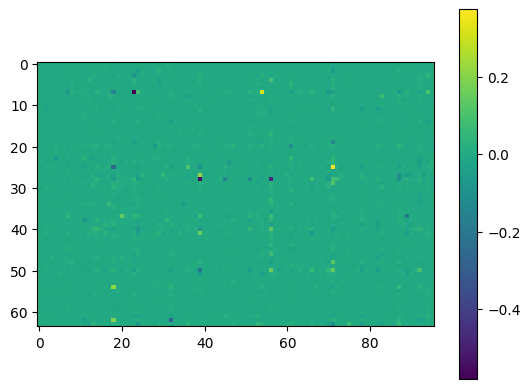

In [19]:
plt.imshow(if_array[:, :96])
plt.colorbar()

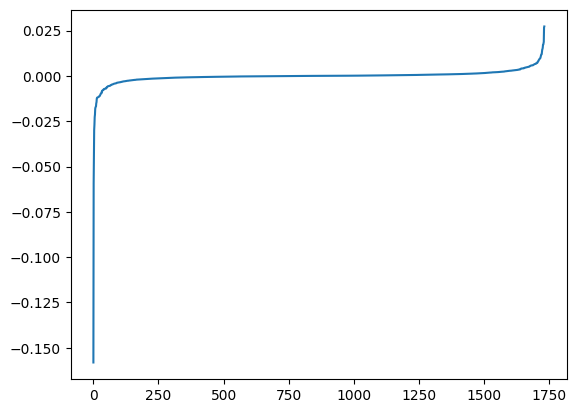

In [20]:
i = 1
plt.plot(sorted(if_array[i]))

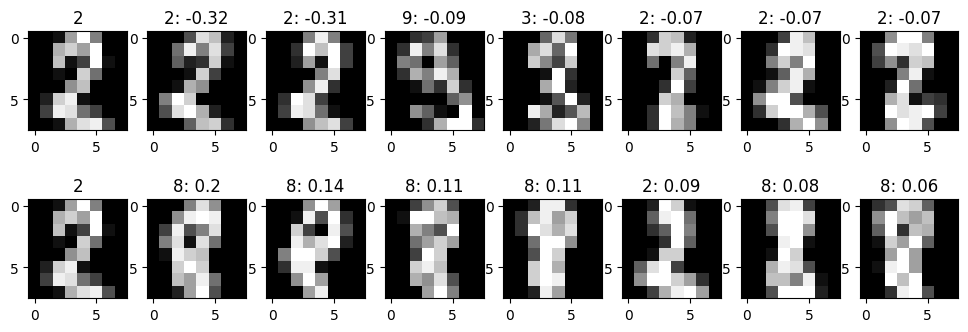

In [21]:
i = 11

fig, axes = plt.subplots(2, 8, figsize=(12, 4))
axes[0, 0].imshow(X_val[i][:64].reshape(8, 8), cmap='gray')
axes[0, 0].set_title(y_val[i])

axes[1, 0].imshow(X_val[i][:64].reshape(8, 8), cmap='gray')
axes[1, 0].set_title(y_val[i])

tmp = np.argsort(if_array[i])

for j in range(1, 8):
    indice = tmp[j-1]
    axes[0, j].imshow(X_train[indice][:64].reshape(8, 8), cmap='gray')
    axes[0, j].set_title("{}: {}".format(y_train[indice], np.round(if_array[i][indice], 2)))

tmp = np.argsort(if_array[i])[::-1]
for j in range(1, 8):
    indice = tmp[j-1]
    axes[1, j].imshow(X_train[indice][:64].reshape(8, 8), cmap='gray')
    axes[1, j].set_title("{}: {}".format(y_train[indice], np.round(if_array[i][indice], 2)))